Saving earthquake_data.csv to earthquake_data.csv


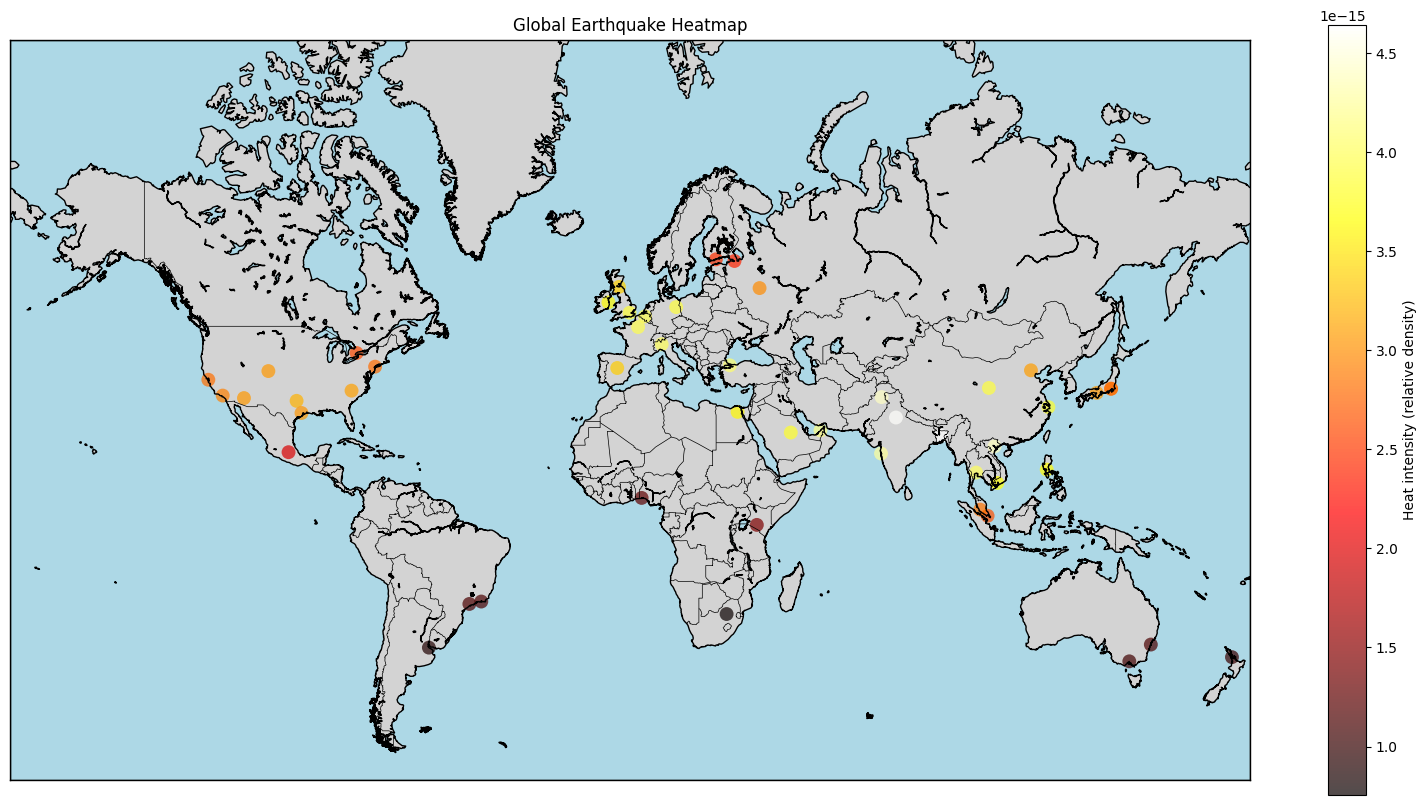

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde

# Load CSV
df = pd.read_csv("earthquake_data.csv")

# Extract data
lat = df['latitude'].values
lon = df['longitude'].values
mag = df['magnitude'].values

# Set up figure
plt.figure(figsize=(20, 10))

# Initialize Basemap
m = Basemap(projection='merc',
            llcrnrlat=-60,
            urcrnrlat=80,
            llcrnrlon=-180,
            urcrnrlon=180,
            resolution='l')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Project coordinates
x, y = m(lon, lat)

# KDE density estimation
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Heatmap plot
plt.scatter(x, y, c=z, s=100, edgecolors='none', cmap='hot', alpha=0.7)
plt.title("Global Earthquake Heatmap")
plt.colorbar(label='Heat intensity (relative density)')
plt.show()
